In [4]:
import numpy as np
%load_ext autoreload
%autoreload 2

In [10]:
import pandas as pd

df = pd.read_csv('../data/DLBCL_test.csv')
candidates = ['TMTV', 'Dmax']

In [11]:
n_fakes = 10
df_random = pd.DataFrame(data=np.random.uniform(0,1, (df.shape[0], int(n_fakes))), index=df.index)
df_random.columns = df_random.columns.astype('str')
random_cols = df_random.columns
df = pd.concat([df, df_random], axis=1)
candidates = ['TMTV', 'Dmax']+random_cols.tolist()

Selection started...

Verifying confounders settings...
Confounders follow proportional hazard assumptions

Starting pre-selection
12 candidates remain after dropping candidates with NaNs.
12 candidates remain after dropping constant candidates.
12 candidates remain after dropping candidates with low variance.
12 candidates remain after dropping candidates sensitive to confounders.
12 candidates remain after dropping duplicated candidates.


Computing scores of permutations: 100%|██████████| 10/10 [00:00<00:00, 64.34it/s]


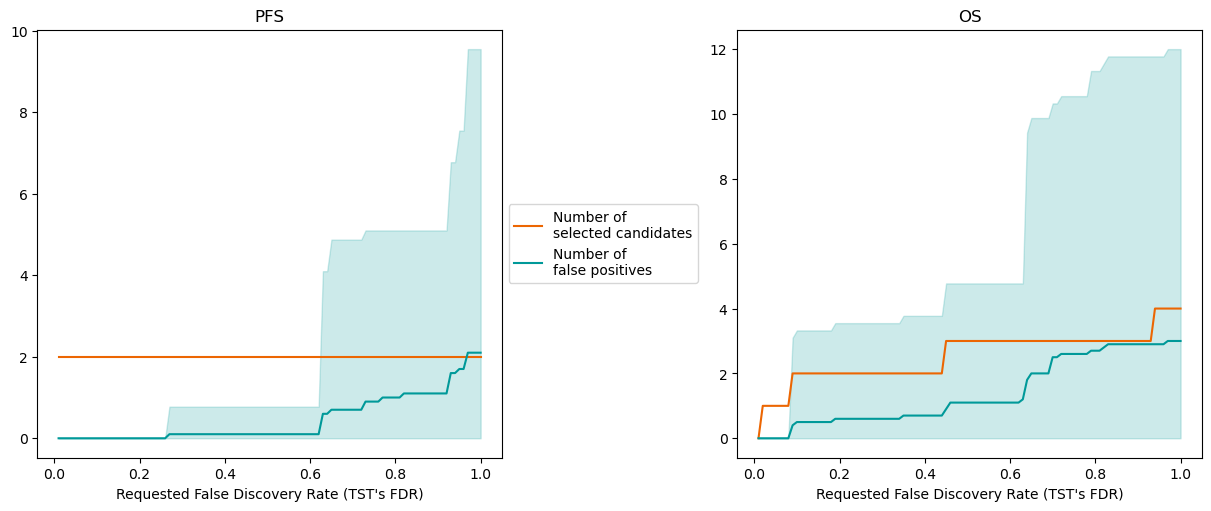

In [32]:
import robi

res = robi.make_selection(df,
                    candidates=candidates,
                    targets = {
                      'PFS': ('PFS_months', 'PFS_event_happened'),
                      'OS': ('OS_months', 'OS_event_happened'),
                    },
                    confounders = ['ECOG', 'aaIPI', 'treatment', 'sex'],
                    strata = ['treatment'],
                    max_corr=0.5,
                    n_workers=7,
                    n_random=1e4,
                    n_permut_nfp=10,
                    verbose=True,
                    device='cuda')

In [28]:
res

(                                                           sel_OS  n_sel_OS  \
 permissiveness                                                                
 0.01                                                           []         0   
 0.02                                                           []         0   
 0.03                                                           []         0   
 0.04                                                           []         0   
 0.05                                                           []         0   
 ...                                                           ...       ...   
 0.96            [375, 352, 36, 583, 570, 817, 919, 760, 694, 1...        16   
 0.97            [375, 352, 36, 583, 570, 817, 919, 760, 694, 1...        16   
 0.98            [375, 352, 36, 583, 570, 817, 919, 760, 694, 1...        16   
 0.99            [375, 352, 36, 583, 570, 817, 919, 760, 694, 1...        16   
 1.00            [375, 352, 36, 583, 570